# Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

# Content
This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

# Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/MENTAL HEALTH DATASET.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Further information about the data

In [3]:
data.shape

(1259, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


Hence, the only numerical column is 'Age' and the rest are categorical columns

In [6]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

## Dropping The Columns

Since the columns 'state' and 'comments' have large no. of missing values, we'd drop those columns.

In [7]:
data.drop(['state', 'comments'], axis = 1, inplace=True)

Let's also remove the variables that are not explanatory

In [8]:
data.drop(['Timestamp','Country',
         'no_employees','remote_work','tech_company','wellness_program',
         'seek_help','mental_health_consequence','phys_health_consequence',
         'coworkers','supervisor','mental_health_interview','phys_health_interview',
         'mental_vs_physical'], axis=1, inplace=True)

## Imputing The Null values

In [9]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [10]:
data.self_employed.fillna('No', inplace=True)

Similarly,

In [11]:
data.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [12]:
data.work_interfere.fillna('Sometimes', inplace=True)

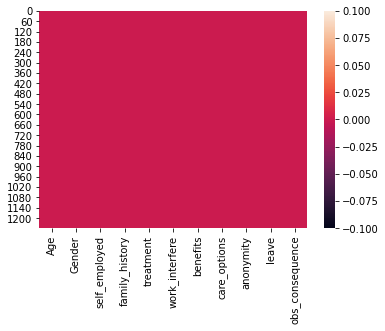

In [13]:
sns.heatmap(data.isnull())

## Data Cleaning

### Removing outliers from the age column

In [14]:
data.drop(data[data.Age < 0].index , inplace=True)
data.drop(data[data.Age > 100].index, inplace = True)


In [15]:
data.shape

(1254, 11)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


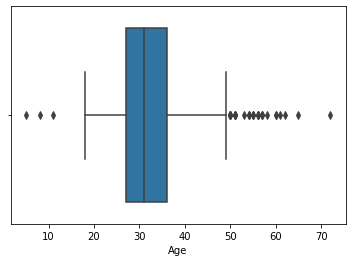

In [16]:
sns.boxplot(data['Age'])

### Cleaning Gender column

In [17]:
data['Gender'] = data['Gender'].str.strip()
data['Gender'].value_counts()

Male                                              616
male                                              205
Female                                            123
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Female (trans)                                      2
Cis Male                                            2
Man                                                 2
non-binary                                          1
Male-ish                                            1
male leaning androgynous                            1
Femake                                              1
cis male                                            1
Cis Female                  

Let's map the genders to M, F and Q for males, females and non-cisgenders  respectively.Input values ​​with unknown interpretation are changed to NaN and data rows are deleted.

In [18]:
gen_dict = {'Female':'F','M':'M','Male':'M','male':'M','female':'F','m':'M','Male-ish':'M','maile':'M',
            'Trans-female':'F','Cis Female':'F','F':'F','something kinda male?':np.nan,'Cis Male':'M',
            'Woman':'F','f':'F','Mal':'M','Male (CIS)':'M','queer/she/they':'Q','non-binary':'Q',
            'Femake':'F','woman':'F','Make':'M','Nah':np.nan,'All':'H','Enby':'Q','fluid':'Q',
            'Genderqueer':'Q','Female ':'F','Androgyne':'Q','Agender':'Q','cis-female/femme':'F',
            'Guy (-ish) ^_^':'M','male leaning androgynous':'Q','Male ':'M','Man':'M','Trans woman':'F',
            'msle':'M','Neuter':'Q','Female (trans)':'F','queer':'Q','Female (cis)':'F','Mail':'M',
            'cis male':'M','A little about you':np.nan,'Malr':'M','p':np.nan,'femail':'F','Cis Man':'M',
            'ostensibly male, unsure what that really means':np.nan}


In [19]:
data['Gender'].replace(gen_dict, inplace=True)

In [20]:
data.dropna(inplace=True)

In [21]:
data['Gender'].value_counts()

M    989
F    251
Q     10
Name: Gender, dtype: int64

#### Let's look at the other variable too.

In [22]:
data['family_history'].value_counts()

No     762
Yes    488
Name: family_history, dtype: int64

In [23]:
data['treatment'].value_counts()

Yes    630
No     620
Name: treatment, dtype: int64

In [24]:
data['benefits'].value_counts()

Yes           471
Don't know    407
No            372
Name: benefits, dtype: int64

In [25]:
data['care_options'].value_counts()

No          498
Yes         438
Not sure    314
Name: care_options, dtype: int64

In [26]:
data['anonymity'].value_counts()

Don't know    814
Yes           372
No             64
Name: anonymity, dtype: int64

In [27]:
data['leave'].value_counts()

Don't know            560
Somewhat easy         265
Very easy             204
Somewhat difficult    125
Very difficult         96
Name: leave, dtype: int64

In [28]:
data['obs_consequence'].value_counts()

No     1069
Yes     181
Name: obs_consequence, dtype: int64

The rest of the data looks clean and hence we can move to data visualisation for further insights.